In [1]:
%reset
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from numpy import random
import datetime

import functools
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [2]:
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

/root/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def shift_df_single_variate(orig_dataframe, column_to_shift, shift_val):
    shifted_df = pd.DataFrame()
    for act_shift in range(shift_val):
        shifted_df['t-{0}'.format(act_shift + 1)] = orig_dataframe.shift(act_shift+1)[column_to_shift]
    shifted_df['result'] = orig_dataframe[column_to_shift]
    return shifted_df

In [4]:
house_data = 'houses/house_1_avg_900.csv'

act_df = pd.read_table(house_data,
                       parse_dates=True,
                       header=0,
                       index_col=0,
                       sep=",",
                       decimal=".")

act_df.head(2)

,1mains,2mains,3oven,4oven,5refrigerator,6dishwaser,7kitchen_outlets,8kitchen_outlets,9lighting,10washer_dryer,11microwave,12bathroom_gfi,13electric_heat,14stove,15kitchen_outlets,16kitchen_outlets,17lighting,18lighting,19washer_dryer,20washer_dryer
0date,,,,,,,,,,,,,,,,,,,,
2011-04-18 13:15:00,221.499342,120.885902,0.0,0.020325,5.983740,0.284553,34.268293,23.065041,81.032520,0.01626,4.926829,0.991870,0.016260,0.000000,1.365854,0.008130,65.056911,45.699187,0.0,0.020325
2011-04-18 13:30:00,580.453000,118.680856,0.0,0.000000,5.974468,0.302128,31.944681,21.063830,80.255319,0.00000,4.693617,358.931915,2.212766,1.855319,1.965957,0.876596,65.472340,44.910638,0.0,0.000000


In [242]:
circuit_columns = act_df.columns[2:]
consump_df = pd.DataFrame()
#consump_df.index = act_df.index
consump_df['sum_consumption'] = act_df[circuit_columns].sum(1)
shift = 96
consumption_shifted = shift_df_single_variate(consump_df, 'sum_consumption', shift).dropna()
x_predict = np.array(consumption_shifted.drop('result', axis=1))[-shift:]
consumption_shifted = consumption_shifted[:-shift]
consumption_shifted.head(2)

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-88,t-89,t-90,t-91,t-92,t-93,t-94,t-95,t-96,result
0date,,,,,,,,,,,,,,,,,,,,,
2011-04-19 13:15:00,176.160338,175.831933,352.164557,205.016807,273.970464,637.596639,556.493671,1149.260684,368.236287,142.722689,...,353.639241,329.721519,136.970588,501.802521,453.200422,180.886555,185.481013,620.459574,262.756098,176.449580
2011-04-19 13:30:00,176.449580,176.160338,175.831933,352.164557,205.016807,273.970464,637.596639,556.493671,1149.260684,368.236287,...,257.394958,353.639241,329.721519,136.970588,501.802521,453.200422,180.886555,185.481013,620.459574,590.534043


In [243]:
consumption_shifted.shape

(3291, 97)

## Learning the model

In [244]:
x_orig = np.array(consumption_shifted.drop('result', axis=1))

In [245]:
y_orig = np.array(consumption_shifted['result'])

In [246]:
from sklearn import svm
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import ARDRegression

X_train, X_test, y_train, y_test = cross_validation.train_test_split(x_orig, y_orig, test_size=0.3)

model = linear_model.Ridge (alpha = 0.5)


#model = svm.SVR(kernel='linear')
#model = LinearRegression(normalize=True)


model.fit(X_train, y_train)
model.score(X_test, y_test)

#predicted= model.predict(x_test)

0.48581459643754243

## prediction

In [251]:
consumption_shifted.tail(2)

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-88,t-89,t-90,t-91,t-92,t-93,t-94,t-95,t-96,result
0date,,,,,,,,,,,,,,,,,,,,,
2011-05-23 19:30:00,245.050420,327.869198,178.773109,179.485232,180.726891,198.139241,381.303797,295.993671,82.798206,102.088496,...,305.399160,173.726891,104.911392,390.212766,2380.843348,2716.205508,1108.029148,119.012605,123.924051,182.957983
2011-05-23 19:45:00,182.957983,245.050420,327.869198,178.773109,179.485232,180.726891,198.139241,381.303797,295.993671,82.798206,...,2113.061674,305.399160,173.726891,104.911392,390.212766,2380.843348,2716.205508,1108.029148,119.012605,202.206751


In [256]:
predicted_val = model.predict(x_predict)
predictem_datetime = pd.date_range("2011-05-23 19:45:00", periods=shift, freq="15min")

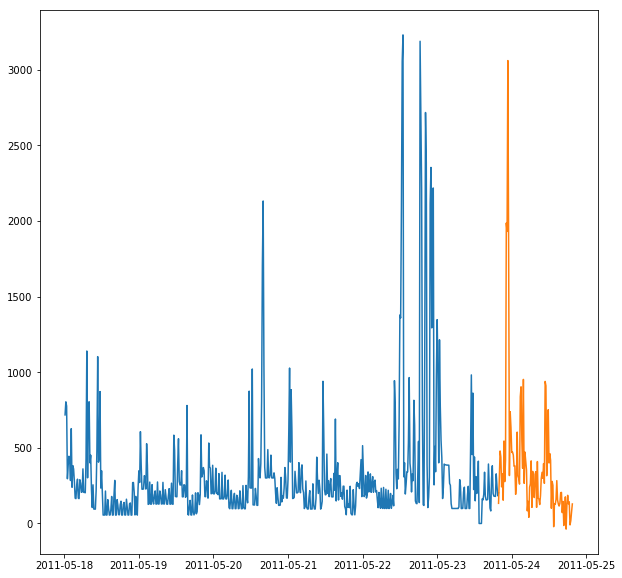

In [284]:
plt.rcParams['figure.figsize']=(10, 10)

plt.plot(consumption_shifted[consumption_shifted.index > '2011-05-18'].result)
plt.plot(predicted_series)